In [2]:
#Se importan las librerias 

import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
import requests
import stylecloud
import stop_words
import urllib.request
from IPython.display import Image
import nltk
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import pandas.util.testing as tm
nltk.download('punkt')
import string
import re
nltk.download('stopwords')
sns.set(rc={'figure.figsize':(11.7,8.27)})

/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rodolfopardo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rodolfopardo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
from textblob import TextBlob

In [17]:
#Recopilamos data

youtube = pd.read_csv('youtube.csv')
tuits = pd.read_csv('twitter_scrap.csv')



In [20]:
tuits.language.value_counts(normalize = True)

en     0.867790
ja     0.059147
es     0.024538
de     0.008240
fr     0.008240
pt     0.006775
und    0.005493
tr     0.003296
pl     0.002930
ar     0.002930
in     0.002564
it     0.001831
nl     0.001282
vi     0.000549
th     0.000549
fi     0.000549
et     0.000549
ru     0.000366
ca     0.000366
ro     0.000366
da     0.000366
ko     0.000183
no     0.000183
iw     0.000183
uk     0.000183
eu     0.000183
cs     0.000183
or     0.000183
Name: language, dtype: float64

In [4]:
#Primeros valores

youtube.head()

,Relationship,Comment Type,Comment,Author Display Name,Author Channel URL,Video URL,Like Count,Published At,Mes,dia_semana,ano,dia
0,Commented Video,Comment,@Ryan looks like you&#39;ve totally revamped t...,Rahul Popuri,http://www.youtube.com/channel/UC_VbzGnLAp0R2X...,https://www.youtube.com/watch?v=ZZNb1NOPTp8,1.0,24/7/2013 20:47:20,7,4,2013,24
1,Commented Video,Comment,"I m quiet a newbie, but who knows maybe someon...",Raphaël saclé,http://www.youtube.com/channel/UC-uMKI1jQbl2lo...,https://www.youtube.com/watch?v=ZZNb1NOPTp8,0.0,25/7/2013 15:19:11,7,5,2013,25
2,Commented Video,Comment,"very informative, will definitely give it a try",Pallav Das,http://www.youtube.com/channel/UCqwdJEft-0ayzb...,https://www.youtube.com/watch?v=ZZNb1NOPTp8,0.0,28/7/2013 10:01:50,7,1,2013,28
3,Commented Video,Comment,2:38 not bad,Derek Ries,http://www.youtube.com/channel/UCJ2d3acHfsC40y...,https://www.youtube.com/watch?v=ZZNb1NOPTp8,0.0,28/7/2013 17:14:35,7,1,2013,28
4,Commented Video,Comment,She MUST be an Android! There is no other expl...,FxVisionary,http://www.youtube.com/channel/UCwc4ey16CbhVt5...,https://www.youtube.com/watch?v=ZZNb1NOPTp8,0.0,29/7/2013 20:16:09,7,2,2013,29


In [7]:
youtube.shape

(8152, 12)

In [41]:
tuits.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Vertex 1,Relationship,Tweet,URLs in Tweet,Domains in Tweet,Hashtags in Tweet,Tweet Date (UTC),Date,Time,Twitter Page for Tweet,Favorite Count,Language,Retweet Count
1,lak_gcp,MentionsInRetweet,A New @GoogleCloud Data Analytics Tool Is Comi...,http://bit.ly/3eXxAmJ,bit.ly,NaN,7/5/2021 16:11,7/5/2021,16:11:53,https://twitter.com/lak_gcp/status/13907009249...,0,en,7
2,lak_gcp,MentionsInRetweet,A New @GoogleCloud Data Analytics Tool Is Comi...,http://bit.ly/3eXxAmJ,bit.ly,NaN,7/5/2021 16:11,7/5/2021,16:11:53,https://twitter.com/lak_gcp/status/13907009249...,0,en,7
3,lak_gcp,MentionsInRetweet,A New @GoogleCloud Data Analytics Tool Is Comi...,http://bit.ly/3eXxAmJ,bit.ly,NaN,7/5/2021 16:11,7/5/2021,16:11:53,https://twitter.com/lak_gcp/status/13907009249...,0,en,7
4,lak_gcp,MentionsInRetweet,A New @GoogleCloud Data Analytics Tool Is Comi...,http://bit.ly/3eXxAmJ,bit.ly,NaN,7/5/2021 16:11,7/5/2021,16:11:53,https://twitter.com/lak_gcp/status/13907009249...,0,en,7


In [40]:
tuits.shape

(5462, 13)

In [25]:
#Ultimos Valores

youtube.tail()

,relacion,tipo_comentario,comentario,autor,autor_channel_url,video_url,likes,fecha,mes,dia_semana,ano,dia
8147,Posted Video,NaN,NaN,NaN,NaN,https://www.youtube.com/watch?v=vmOMataJZWw,NaN,4/10/2019 1:12,10,6,2019,4
8148,Posted Video,NaN,NaN,NaN,NaN,https://www.youtube.com/watch?v=DY5zOx1nxj8,NaN,6/7/2019 16:28,7,7,2019,6
8149,Posted Video,NaN,NaN,NaN,NaN,https://www.youtube.com/watch?v=5RGyepqiEGw,NaN,12/1/2019 21:00,1,7,2019,12
8150,Posted Video,NaN,NaN,NaN,NaN,https://www.youtube.com/watch?v=4D3X6Xl5c_Y,NaN,1/11/2019 15:00,11,6,2019,1
8151,Posted Video,NaN,NaN,NaN,NaN,https://www.youtube.com/watch?v=OiDWqu0oQfo,NaN,6/7/2019 16:27,7,7,2019,6


In [26]:
#Visualizando columnas

youtube.columns

Index(['relacion', 'tipo_comentario', 'comentario', 'autor',
       'autor_channel_url', 'video_url', 'likes', 'fecha', 'mes', 'dia_semana',
       'ano', 'dia'],
      dtype='object')

In [8]:
#Se modifican las columnas y sus nombres

columnas = ["relacion", "tipo_comentario", "comentario", "autor", "autor_channel_url", "video_url", "likes",
           "fecha", "mes", "dia_semana", "ano", "dia"]

youtube.columns = columnas

In [9]:
#Valores nulos

youtube.isnull().sum()

relacion               0
tipo_comentario      251
comentario           251
autor                251
autor_channel_url    251
video_url              0
likes                251
fecha                  0
mes                    0
dia_semana             0
ano                    0
dia                    0
dtype: int64

#### <font color = "blue">Se eliminan valores nulos de la muestra correspondientes a comentarios para el objetivo del estudio</font>

In [12]:
#Se eliminan valores nulos

youtube = youtube.dropna()

In [14]:
#Valores nulos

youtube.isnull().sum()

relacion             0
tipo_comentario      0
comentario           0
autor                0
autor_channel_url    0
video_url            0
likes                0
fecha                0
mes                  0
dia_semana           0
ano                  0
dia                  0
dtype: int64

In [13]:
youtube.head()

,relacion,tipo_comentario,comentario,autor,autor_channel_url,video_url,likes,fecha,mes,dia_semana,ano,dia
0,Commented Video,Comment,@Ryan looks like you&#39;ve totally revamped t...,Rahul Popuri,http://www.youtube.com/channel/UC_VbzGnLAp0R2X...,https://www.youtube.com/watch?v=ZZNb1NOPTp8,1.0,24/7/2013 20:47:20,7,4,2013,24
1,Commented Video,Comment,"I m quiet a newbie, but who knows maybe someon...",Raphaël saclé,http://www.youtube.com/channel/UC-uMKI1jQbl2lo...,https://www.youtube.com/watch?v=ZZNb1NOPTp8,0.0,25/7/2013 15:19:11,7,5,2013,25
2,Commented Video,Comment,"very informative, will definitely give it a try",Pallav Das,http://www.youtube.com/channel/UCqwdJEft-0ayzb...,https://www.youtube.com/watch?v=ZZNb1NOPTp8,0.0,28/7/2013 10:01:50,7,1,2013,28
3,Commented Video,Comment,2:38 not bad,Derek Ries,http://www.youtube.com/channel/UCJ2d3acHfsC40y...,https://www.youtube.com/watch?v=ZZNb1NOPTp8,0.0,28/7/2013 17:14:35,7,1,2013,28
4,Commented Video,Comment,She MUST be an Android! There is no other expl...,FxVisionary,http://www.youtube.com/channel/UCwc4ey16CbhVt5...,https://www.youtube.com/watch?v=ZZNb1NOPTp8,0.0,29/7/2013 20:16:09,7,2,2013,29


In [15]:
youtube.relacion.value_counts(normalize = True)

Commented Video    0.568029
Replied Comment    0.431971
Name: relacion, dtype: float64

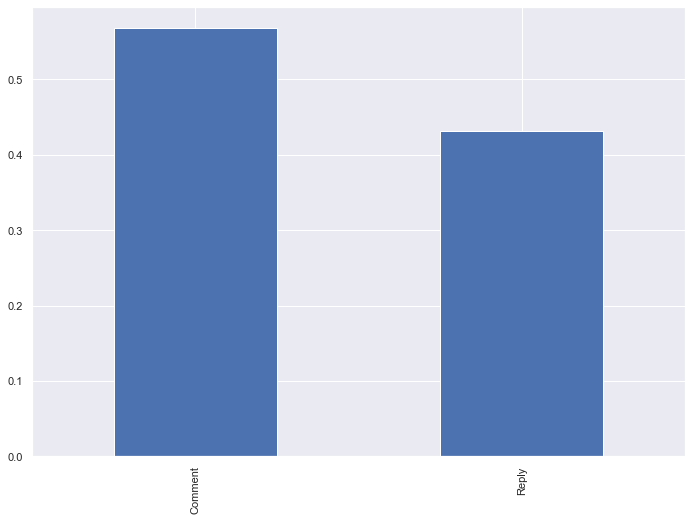

In [68]:
youtube.tipo_comentario.value_counts(normalize = True).plot.bar()

In [21]:
youtube.groupby('autor')['likes'].sum().sort_values(ascending = False).head(30).to_csv('Influencers.csv')

In [24]:
youtube.mes.value_counts()

7     1007
4      762
3      710
8      652
1      651
10     641
12     631
9      627
11     594
2      586
5      576
6      464
Name: mes, dtype: int64

In [26]:
youtube.ano.value_counts().sort_values(ascending = False)

2020    4275
2021    1567
2019    1384
2018     391
2017     210
2016      33
2013      14
2015      14
2014      13
Name: ano, dtype: int64

In [44]:
youtube.dia.value_counts()

24    421
19    399
5     363
27    334
23    301
28    295
4     292
8     288
15    285
3     281
22    277
25    275
21    271
9     268
14    266
20    262
18    259
30    252
29    251
26    250
1     246
13    236
12    230
17    226
16    223
10    220
11    218
2     201
7     178
6     154
31    130
Name: dia, dtype: int64

In [49]:
tuits.shape

(5462, 13)

In [50]:
tuits[1:5462]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
1,lak_gcp,MentionsInRetweet,A New @GoogleCloud Data Analytics Tool Is Comi...,http://bit.ly/3eXxAmJ,bit.ly,NaN,7/5/2021 16:11,7/5/2021,16:11:53,https://twitter.com/lak_gcp/status/13907009249...,0,en,7
2,lak_gcp,MentionsInRetweet,A New @GoogleCloud Data Analytics Tool Is Comi...,http://bit.ly/3eXxAmJ,bit.ly,NaN,7/5/2021 16:11,7/5/2021,16:11:53,https://twitter.com/lak_gcp/status/13907009249...,0,en,7
3,lak_gcp,MentionsInRetweet,A New @GoogleCloud Data Analytics Tool Is Comi...,http://bit.ly/3eXxAmJ,bit.ly,NaN,7/5/2021 16:11,7/5/2021,16:11:53,https://twitter.com/lak_gcp/status/13907009249...,0,en,7
4,lak_gcp,MentionsInRetweet,A New @GoogleCloud Data Analytics Tool Is Comi...,http://bit.ly/3eXxAmJ,bit.ly,NaN,7/5/2021 16:11,7/5/2021,16:11:53,https://twitter.com/lak_gcp/status/13907009249...,0,en,7
5,lak_gcp,MentionsInRetweet,A New @GoogleCloud Data Analytics Tool Is Comi...,http://bit.ly/3eXxAmJ,bit.ly,NaN,7/5/2021 16:11,7/5/2021,16:11:53,https://twitter.com/lak_gcp/status/13907009249...,0,en,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5457,riccardobua,Retweet,"ICYMI, Alphabet reported ""... Google Cloud seg...",NaN,NaN,collaboration,############,12/5/2021,16:20:30,https://twitter.com/riccardobua/status/1392515...,0,en,2
5458,gdgcloudnd,Tweet,Google Cloud and Seagate: Transforming hard-di...,https://ift.tt/3ttQ3wk,ift.tt,NaN,7/5/2021 16:21,7/5/2021,16:21:02,https://twitter.com/gdgcloudnd/status/13907032...,0,en,0
5459,gdgcloudnd,Tweet,Reinventing the future with a transformation c...,https://ift.tt/3y32anC,ift.tt,NaN,############,10/5/2021,16:21:05,https://twitter.com/gdgcloudnd/status/13917904...,0,en,0
5460,gdgcloudnd,Tweet,Translation API Advanced can translate busines...,https://ift.tt/3ocymAM,ift.tt,NaN,############,12/5/2021,14:21:45,https://twitter.com/gdgcloudnd/status/13924851...,0,en,0


In [27]:
youtube.comentario

0       @Ryan looks like you&#39;ve totally revamped t...
1       I m quiet a newbie, but who knows maybe someon...
2         very informative, will definitely give it a try
3                                            2:38 not bad
4       She MUST be an Android! There is no other expl...
                              ...                        
8005    Get $300 and start running workloads for free ...
8006    Get $300 and start running workloads for free ...
8007    Sundar Pichai, CEO, Google, <a href="https://w...
8008    Get $300 and start running workloads for free ...
8009    Get $300 and start running workloads for free ...
Name: comentario, Length: 7901, dtype: object

In [28]:
lista_comentarios = youtube['comentario'].tolist()

In [29]:
lista_comentarios

['@Ryan looks like you&#39;ve totally revamped the experience now! The new cloud console looks great.. I&#39;m going to have to give this a try right away!',
 'I m quiet a newbie, but who knows maybe someone can help. Despite the doc, I didn&#39;t understand how to Upload and Download Data with bulkloader.yaml file in the tutorial. I&#39;m stuck there',
 'very informative, will definitely give it a try',
 '2:38 not bad',
 'She MUST be an Android! There is no other explanation.',
 'true true.. I am trying now to use them again.. for example parse.com is 10 x better for mobile apps.. I can integrate it in 1 min...',
 'I&#39;m having trouble understanding why visual editors such as netbeans were abandoned. UI development for Swing, motif, awt and other toolkits were trivial. Then *poof* - we&#39;re hand-jamming an xml file and referring to it as &quot;ui code&quot;.\n \n If you&#39;re reading this, check out Netbeans and take a pass at a Swing application. You&#39;ll then share my frustra

In [30]:
with open('titulo.txt', 'w') as f:
    for item in lista_comentarios:
        f.write("%s\n" % item)


In [32]:
string = str(lista_comentarios)
stop = stop_words.get_stop_words("en")
stylecloud.gen_stylecloud(string,
                          icon_name='fab fa-youtube',
                          custom_stopwords=stop, 
                         output_name='titulo.png')

In [33]:
string = str(lista_comentarios)
stop = stop_words.get_stop_words("es")
stylecloud.gen_stylecloud(string,
                          icon_name='fab fa-youtube',
                          custom_stopwords=stop, 
                         output_name='titulo.png')

## Twitter

In [22]:
tweets = pd.read_csv('twitter_scrap.csv')

In [28]:
tweets_es = tweets[tweets['language'] == "es"]

In [29]:
tweets_es.user.value_counts().head(10)

googlecloud_es    5
gft_es            4
minsaitbyindra    4
atsistemas        3
indracompany      3
micael_gallego    3
cesgarbar         2
marcosdlcs        2
misaelsr96        2
aranchivite       2
Name: user, dtype: int64

In [30]:
tweets.shape

(5461, 13)

In [31]:
tweets.hashtags.value_counts().head(10)

ai googlecloud bigdata                                                                                                                                                                          144
google cloud gooseswap presale                                                                                                                                                                  102
cloud cybersecurity                                                                                                                                                                              70
opensource                                                                                                                                                                                       68
artificialintelligence ai datascience machinelearning bigdata 100daysofcode python deeplearning nlp robots iot                                                                                   54
artificialintelligen

In [49]:
tweets.columns

Index(['user', 'relationship', 'tweet', 'url', 'domains', 'hashtags',
       'Tweet Date (UTC)', 'date', 'time', 'page', 'favorite_count',
       'language', 'retweet_count'],
      dtype='object')

In [51]:
tweets.head()

,user,relationship,tweet,url,domains,hashtags,Tweet Date (UTC),date,time,page,favorite_count,language,retweet_count
0,lak_gcp,MentionsInRetweet,A New @GoogleCloud Data Analytics Tool Is Comi...,http://bit.ly/3eXxAmJ,bit.ly,NaN,7/5/2021 16:11,7/5/2021,16:11:53,https://twitter.com/lak_gcp/status/13907009249...,0,en,7
1,lak_gcp,MentionsInRetweet,A New @GoogleCloud Data Analytics Tool Is Comi...,http://bit.ly/3eXxAmJ,bit.ly,NaN,7/5/2021 16:11,7/5/2021,16:11:53,https://twitter.com/lak_gcp/status/13907009249...,0,en,7
2,lak_gcp,MentionsInRetweet,A New @GoogleCloud Data Analytics Tool Is Comi...,http://bit.ly/3eXxAmJ,bit.ly,NaN,7/5/2021 16:11,7/5/2021,16:11:53,https://twitter.com/lak_gcp/status/13907009249...,0,en,7
3,lak_gcp,MentionsInRetweet,A New @GoogleCloud Data Analytics Tool Is Comi...,http://bit.ly/3eXxAmJ,bit.ly,NaN,7/5/2021 16:11,7/5/2021,16:11:53,https://twitter.com/lak_gcp/status/13907009249...,0,en,7
4,lak_gcp,MentionsInRetweet,A New @GoogleCloud Data Analytics Tool Is Comi...,http://bit.ly/3eXxAmJ,bit.ly,NaN,7/5/2021 16:11,7/5/2021,16:11:53,https://twitter.com/lak_gcp/status/13907009249...,0,en,7


In [52]:
lista_tuits = tweets['tweet'].tolist()

In [61]:
with open('titulo_tuits.txt', 'w') as f:
    for item in lista_tuits:
        f.write("%s\n" % item)


In [62]:
string = str(lista_tuits)
stop = stop_words.get_stop_words("en")
stylecloud.gen_stylecloud(string,
                          icon_name='fab fa-twitter',
                          custom_stopwords=stop, 
                         output_name='tuits.png')

In [57]:
stop.append("HTTPS")
stop.append("CO")
stop.append("google")
stop.append("cloud")
stop.append("Digital")
stop.append("Ocean")

In [7]:
youtube.head()

,Relationship,Comment Type,Comment,Author Display Name,Author Channel URL,Video URL,Like Count,Published At,Mes,dia_semana,ano,dia
0,Commented Video,Comment,@Ryan looks like you&#39;ve totally revamped t...,Rahul Popuri,http://www.youtube.com/channel/UC_VbzGnLAp0R2X...,https://www.youtube.com/watch?v=ZZNb1NOPTp8,1.0,24/7/2013 20:47:20,7,4,2013,24
1,Commented Video,Comment,"I m quiet a newbie, but who knows maybe someon...",Raphaël saclé,http://www.youtube.com/channel/UC-uMKI1jQbl2lo...,https://www.youtube.com/watch?v=ZZNb1NOPTp8,0.0,25/7/2013 15:19:11,7,5,2013,25
2,Commented Video,Comment,"very informative, will definitely give it a try",Pallav Das,http://www.youtube.com/channel/UCqwdJEft-0ayzb...,https://www.youtube.com/watch?v=ZZNb1NOPTp8,0.0,28/7/2013 10:01:50,7,1,2013,28
3,Commented Video,Comment,2:38 not bad,Derek Ries,http://www.youtube.com/channel/UCJ2d3acHfsC40y...,https://www.youtube.com/watch?v=ZZNb1NOPTp8,0.0,28/7/2013 17:14:35,7,1,2013,28
4,Commented Video,Comment,She MUST be an Android! There is no other expl...,FxVisionary,http://www.youtube.com/channel/UCwc4ey16CbhVt5...,https://www.youtube.com/watch?v=ZZNb1NOPTp8,0.0,29/7/2013 20:16:09,7,2,2013,29
